In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-07-08 16:34:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.65MB/s    in 93s     

2020-07-08 16:36:12 (3.32 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
split_dir = '/tmp/rockpaperscissors'

In [4]:
!pip install split-folders

In [5]:
import split_folders

split_folders.ratio(base_dir, output=split_dir, seed=1, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3192.42 files/s]


In [6]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'paper',
 'train',
 'rock',
 'README_rpc-cv-images.txt',
 'val',
 'scissors']

In [7]:
train_dir = '/tmp/rockpaperscissors/train'
validation_dir = '/tmp/rockpaperscissors/val'

In [8]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [9]:
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')
     
test_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest')

In [10]:
    train_generator = train_datagen.flow_from_directory(
            train_dir,  # direktori data latih
            #subset='training',
            target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=4,
            # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
            class_mode='categorical')
     
    validation_generator = train_datagen.flow_from_directory(
            validation_dir, # direktori data validasi
            #subset='validation',
            target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
            class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [11]:
 model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
#        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [12]:
model.compile(loss='categorical_crossentropy',
                  optimizer=tf.optimizers.Adam(),
                  metrics=['accuracy'])

In [13]:
model.fit(
          train_generator,
          steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20,
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)

Epoch 1/20
25/25 - 6s - loss: 1.1407 - accuracy: 0.3600 - val_loss: 1.1094 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 8s - loss: 1.1082 - accuracy: 0.3500 - val_loss: 1.0902 - val_accuracy: 0.4000
Epoch 3/20
25/25 - 7s - loss: 1.1000 - accuracy: 0.2900 - val_loss: 1.0965 - val_accuracy: 0.4000
Epoch 4/20
25/25 - 6s - loss: 1.0990 - accuracy: 0.3700 - val_loss: 1.0967 - val_accuracy: 0.5500
Epoch 5/20
25/25 - 6s - loss: 1.0941 - accuracy: 0.5400 - val_loss: 1.0976 - val_accuracy: 0.3000
Epoch 6/20
25/25 - 6s - loss: 1.0851 - accuracy: 0.3300 - val_loss: 0.9639 - val_accuracy: 0.5500
Epoch 7/20
25/25 - 6s - loss: 0.8477 - accuracy: 0.6186 - val_loss: 0.6975 - val_accuracy: 0.5500
Epoch 8/20
25/25 - 6s - loss: 0.5387 - accuracy: 0.7800 - val_loss: 0.5716 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 6s - loss: 0.5435 - accuracy: 0.8300 - val_loss: 0.4590 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 6s - loss: 0.4845 - accuracy: 0.7900 - val_loss: 0.2882 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
25/25 [==============================] - 6s 247ms/step - loss: 0.2571 - accuracy: 0.9200 - val_loss: 0.3476 - val_accuracy: 0.9500
Epoch 2/20
25/25 [==============================] - 6s 246ms/step - loss: 0.3396 - accuracy: 0.8700 - val_loss: 0.2878 - val_accuracy: 0.9500
Epoch 3/20
25/25 [==============================] - 6s 247ms/step - loss: 0.2836 - accuracy: 0.8900 - val_loss: 0.2928 - val_accuracy: 0.9000
Epoch 4/20
25/25 [==============================] - 6s 245ms/step - loss: 0.1612 - accuracy: 0.9500 - val_loss: 0.3529 - val_accuracy: 0.8000
Epoch 5/20
25/25 [==============================] - 6s 246ms/step - loss: 0.2713 - accuracy: 0.8800 - val_loss: 0.5472 - val_accuracy: 0.8000
Epoch 6/20
25/25 [==============================] - 6s 246ms/step - loss: 0.2519 - accuracy: 0.9200 - val_loss: 0.4996 - val_accuracy: 0.8000
Epoch 7/20
25/25 [==============================] - 6s 245ms/step - loss

Using TensorFlow backend.


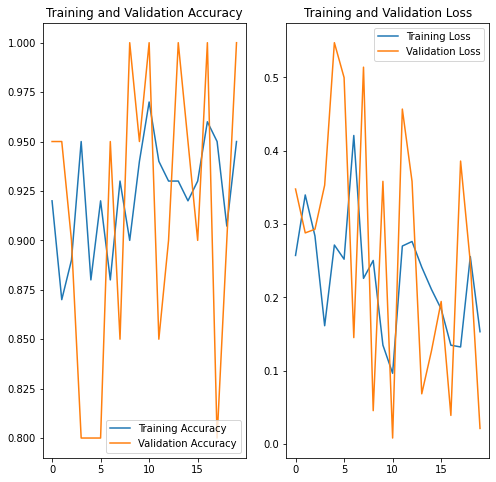

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
rock


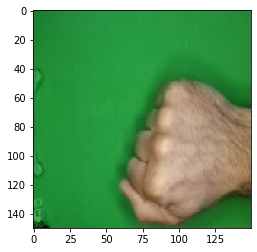

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  result = np.argmax(classes)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')